In [1]:
#Brad's Branch

In [2]:
#clean up csv files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#variables for files
file = 'Data/data.csv'
file_genre = 'Data/data_by_genres.csv'
file_othergenre = 'Data/data_w_genres.csv'

In [4]:
#import csvs
genre_df = pd.read_csv(file_genre)
df = pd.read_csv(file)
othergenre_df = pd.read_csv(file_othergenre)

In [5]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [6]:
#remove brackets, quotations, etc.
clean_df = df
clean_df['artists'] = df['artists'].str.strip('[]')
clean_df['artists'] = df['artists'].str.strip("''")
clean_df['artists'] = df['artists'].str.strip('""')
clean_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,Screamin' Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [7]:
#Drop columns and change column names
clean_df = clean_df[["artists", "danceability", "duration_ms", "explicit", "key", "mode", "name",
                     "popularity", "tempo", "year"]]
clean_df = clean_df.rename(columns={"artists":"Artists", "danceability":"Danceability (0-1)", 
                                    "duration_ms":"Duration (seconds)", "explicit":"Explicit",
                                    "key":"Key", "mode":"Mode", "name":"Song Title",
                                    "popularity":"Popularity (0-100)", "tempo":"Tempo (BPM)", "year":"Release Year"})

clean_df.head()

,Artists,Danceability (0-1),Duration (seconds),Explicit,Key,Mode,Song Title,Popularity (0-100),Tempo (BPM),Release Year
0,Mamie Smith,0.598,168333,0,5,0,Keep A Song In Your Soul,12,149.976,1920
1,Screamin' Jay Hawkins,0.852,150200,0,5,0,I Put A Spell On You,7,86.889,1920
2,Mamie Smith,0.647,163827,0,0,1,Golfing Papa,4,97.600,1920
3,Oscar Velazquez,0.730,422087,0,2,1,True House Music - Xavier Santos & Carlos Gomi...,17,127.997,1920
4,Mixe,0.704,165224,1,10,0,Xuniverxe,2,122.076,1920


In [8]:
#update columns with more relevant values
clean_df["Duration (seconds)"] = ((clean_df["Duration (seconds)"]) / 1000)
clean_df['Explicit'] = clean_df['Explicit'].apply(str)
clean_df['Explicit'] = clean_df['Explicit'].str.replace('0', 'No')
clean_df['Explicit'] = clean_df['Explicit'].str.replace('1', 'Yes')
clean_df['Mode'] = clean_df['Mode'].apply(str)
clean_df['Mode'] = clean_df['Mode'].str.replace('0', 'Minor')
clean_df['Mode'] = clean_df['Mode'].str.replace('1', 'Major')
clean_df['Key'] = clean_df['Key'].apply(str)
clean_df['Key'] = clean_df['Key'].str.replace('10', 'Bb')
clean_df['Key'] = clean_df['Key'].str.replace('11', 'B')
clean_df['Key'] = clean_df['Key'].str.replace('0', 'C')
clean_df['Key'] = clean_df['Key'].str.replace('1', 'Db')
clean_df['Key'] = clean_df['Key'].str.replace('2', 'D')
clean_df['Key'] = clean_df['Key'].str.replace('3', 'Eb')
clean_df['Key'] = clean_df['Key'].str.replace('4', 'E')
clean_df['Key'] = clean_df['Key'].str.replace('5', 'F')
clean_df['Key'] = clean_df['Key'].str.replace('6', 'Gb')
clean_df['Key'] = clean_df['Key'].str.replace('7', 'G')
clean_df['Key'] = clean_df['Key'].str.replace('8', 'Ab')
clean_df['Key'] = clean_df['Key'].str.replace('9', 'A')

clean_df.head()

,Artists,Danceability (0-1),Duration (seconds),Explicit,Key,Mode,Song Title,Popularity (0-100),Tempo (BPM),Release Year
0,Mamie Smith,0.598,168.333,No,F,Minor,Keep A Song In Your Soul,12,149.976,1920
1,Screamin' Jay Hawkins,0.852,150.200,No,F,Minor,I Put A Spell On You,7,86.889,1920
2,Mamie Smith,0.647,163.827,No,C,Major,Golfing Papa,4,97.600,1920
3,Oscar Velazquez,0.730,422.087,No,D,Major,True House Music - Xavier Santos & Carlos Gomi...,17,127.997,1920
4,Mixe,0.704,165.224,Yes,Bb,Minor,Xuniverxe,2,122.076,1920


In [9]:
#Clean up second dataframe
#Drop columns and change column names
clean_genre_df = genre_df
clean_genre_df = clean_genre_df[["genres", "danceability", "tempo", 
                                 "popularity", "key", "mode"]]
clean_genre_df = clean_genre_df.rename(columns={"genres":"Genres", "danceability":"Danceability (0-1)", 
                                                "key":"Key", "mode":"Mode",
                                                "popularity":"Popularity (0-100)", "tempo":"Tempo (BPM)"})

clean_genre_df.head()

,Genres,Danceability (0-1),Tempo (BPM),Popularity (0-100),Key,Mode
0,21st century classical,0.284100,91.351000,6.600000,4,1
1,432hz,0.312000,118.900933,41.200000,11,1
2,8-bit,0.673000,192.816000,0.000000,5,1
3,[],0.546937,116.068980,12.350770,7,1
4,a cappella,0.516172,105.506031,39.086248,7,1


In [10]:
#drop row with bad data
clean_genre_df = clean_genre_df.drop(3)

In [11]:
#update columns with more relevant values

clean_genre_df['Mode'] = clean_genre_df['Mode'].apply(str)
clean_genre_df['Mode'] = clean_genre_df['Mode'].str.replace('0', 'Minor')
clean_genre_df['Mode'] = clean_genre_df['Mode'].str.replace('1', 'Major')
clean_genre_df['Key'] = clean_genre_df['Key'].apply(str)
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('10', 'Bb')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('11', 'B')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('0', 'C')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('1', 'Db')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('2', 'D')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('3', 'Eb')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('4', 'E')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('5', 'F')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('6', 'Gb')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('7', 'G')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('8', 'Ab')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('9', 'A')

clean_genre_df.head()

,Genres,Danceability (0-1),Tempo (BPM),Popularity (0-100),Key,Mode
0,21st century classical,0.284100,91.351000,6.600000,E,Major
1,432hz,0.312000,118.900933,41.200000,B,Major
2,8-bit,0.673000,192.816000,0.000000,F,Major
4,a cappella,0.516172,105.506031,39.086248,G,Major
5,abstract,0.473600,142.495400,43.800000,F,Major


In [12]:
#Obtain track counts for artists and create a dataframe from that information
artist_prolific_df = clean_df['Artists'].value_counts().reset_index()
artist_prolific_df = artist_prolific_df.rename(columns={"index":"Artist Name", "Artists":"Track Count"})
artist_prolific_df.head(20)

,Artist Name,Track Count
0,Tadeusz Dolega Mostowicz,1281
1,Эрнест Хемингуэй,1175
2,Эрих Мария Ремарк,1062
3,Francisco Canaro,951
4,Ignacio Corsini,624
5,Frank Sinatra,621
6,Elvis Presley,494
7,Bob Dylan,459
8,Johnny Cash,456
9,"Francisco Canaro', 'Charlo",456


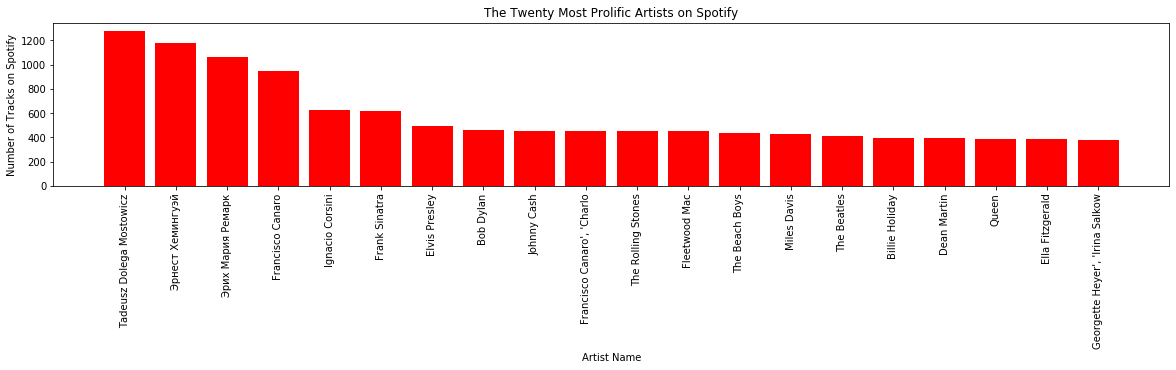

In [13]:
#Create visualizations for artist prolific data
x_axis = artist_prolific_df["Artist Name"].head(20)
y_axis = artist_prolific_df["Track Count"].head(20)
plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, color='r', align="center")
plt.xticks(rotation="90")
plt.title("The Twenty Most Prolific Artists on Spotify")
plt.xlabel("Artist Name")
plt.ylabel("Number of Tracks on Spotify")
#plt.savefig('ProlificBar.png')

In [14]:
clean_genre_df['Genres'].count
#clean_genre_df.head()

<bound method Series.count of 0       21st century classical
1                        432hz
2                        8-bit
4                   a cappella
5                     abstract
                 ...          
3227          zim urban groove
3228                      zolo
3229                      zouk
3230              zurich indie
3231                    zydeco
Name: Genres, Length: 3231, dtype: object>

In [15]:
othergenre_df

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32534,김효근,0.939000,0.174000,341821.000000,0.321000,0.756000,0.695000,-13.411000,0.042200,138.300000,0.055400,0.000000,3,1,1,[]
32535,나율,0.717000,0.591500,241281.500000,0.473500,0.000000,0.105000,-6.588500,0.053700,107.599000,0.507500,16.000000,1,1,4,[]
32536,미스티,0.416000,0.686000,216715.000000,0.822000,0.000000,0.110000,-6.300000,0.080200,122.047000,0.625000,0.000000,5,0,2,[]
32537,시온 Zion & 한해 Hanhae of 팬텀 Phantom,0.288000,0.739000,242480.000000,0.475000,0.000000,0.075700,-8.920000,0.379000,81.490000,0.800000,8.000000,2,0,2,[]


In [16]:
#Clean ditto marks from genre column and fill in with genre

othergenre_df['genres'] = othergenre_df['genres'].str.strip('[]')
othergenre2_df = othergenre_df.replace(r'^\s*$', np.nan, regex=True)
othergenre2_df['genres'].fillna(method='pad', inplace=True)
othergenre2_df.head(10)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,'show tunes'
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,'show tunes'
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,'show tunes'
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,'show tunes'
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,'show tunes'
5,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.591167,0.484333,218504.500000,0.300608,0.007042,0.176067,-18.579500,0.104958,122.517833,0.424500,33.166667,9,1,24,'show tunes'
6,"""Mama"" Helen Teagarden",0.725000,0.637000,135533.000000,0.512000,0.186000,0.426000,-20.615000,0.210000,134.819000,0.885000,0.000000,8,1,2,'show tunes'
7,"""Test for Victor Young""",0.927000,0.734000,175693.000000,0.474000,0.076200,0.737000,-10.544000,0.256000,132.788000,0.902000,3.000000,10,1,2,'show tunes'
8,"""Weird Al"" Yankovic",0.186821,0.650792,218352.962264,0.693189,0.000045,0.160926,-9.691151,0.082275,132.876604,0.764585,32.867925,9,1,106,"'comedy rock', 'comic', 'parody'"
9,$0dg0d,0.110000,0.732000,160171.000000,0.822000,0.000009,0.154000,-5.387000,0.155000,141.948000,0.740000,0.000000,7,0,2,"'comedy rock', 'comic', 'parody'"


In [17]:
#clean the dataframe
clean_genre2_df = othergenre2_df[["artists", "popularity", "genres"]]
clean_genre2_df = clean_genre2_df.rename(columns={"artists":"Artists", "popularity":"Popularity (0-100)", 
                                    "genres":"Genres"})

clean_genre2_df['Genres'].value_counts()

'rebetiko'                                                                                                                                                                                                    253
'movie tunes'                                                                                                                                                                                                 116
'show tunes'                                                                                                                                                                                                  116
'orchestral performance'                                                                                                                                                                                      100
'classical soprano'                                                                                                                                             